<a href="https://colab.research.google.com/github/PauSanchoBeneyto/Mercadona_Pontia/blob/main/Resolucion_hipotesis_preguntas_impares_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math as mat

import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Cargamos los datos desde nuestro disco local, para poder leer los dataframes que componen nuestro modelo relacional para poder sacar conclusiones en base a las preguntas de als cuales nuestro cliente desea
# obtener informaación relevante para el negocio.

df_compras=pd.read_csv("/content/df.compras.csv")
df_competidores=pd.read_csv("/content/Super_competitors.csv")
df_supermecados=pd.read_excel("/content/Supermercado_final_17072024 (2).xlsx")

# **Dataframe Compras**

In [3]:
# Comenzamos realizando una comprobación de los datos que contienen los dataframes.
# Primero observamos el Dataframe creado de la union de Raw_data y Compras.

df_compras.head()

,Unnamed: 0,id_compra,fecha_compra,id_cliente,id_producto,category,name,description,price,reference_price,reference_unit,insert_date,id_reference_supermarket,categorias,subcategorias
0,0,0,2022-06-02,19,f65b04468e58cc9f604cb097236872fe,alimentacion_caldos_sopas_y_pures_caldo_concen...,KNORR doble caldo de carne estuche 24 pastilla...,NaN,2.89,0.12,ud,2021-03-06 00:00:00,M3,alimentacion,caldos sopas y pures caldo concentrado y past...
1,1,1,2022-08-02,27,ce43ded19a577ac0aaa1e3b0cf2b5f1a,desayuno_dulces_y_pan_cafe_capsulas,DIA café con leche 16 cápsulas caja 160 gr,NaN,3.89,0.24,ud,2021-03-06 00:00:00,M3,desayuno,dulces y pan cafe capsulas
2,2,2,2022-07-09,20,0a56c32642021feae8049bbb840a6153,alimentacion_dieteticos_complementos_nutricion...,VIVISIMA+ colageno envase 50 capsulas,NaN,3.90,0.08,ud,2021-03-06 00:00:00,M3,alimentacion,dieteticos complementos nutricionales
3,3,3,2022-08-18,5,2f8af1c55f93e0b3e4a0b03e5e0f28b4,alimentacion_dieteticos_complementos_nutricion...,NATUR TIERRA óleo de onagra envase 60 cápsulas,NaN,4.75,0.08,ud,2021-03-06 00:00:00,M3,alimentacion,dieteticos complementos nutricionales
4,4,4,2022-06-27,3,d7382d624ca08e4459996938e65935e8,alimentacion_dieteticos_complementos_nutricion...,NATUR TIERRA arándano rojo americano antioxida...,NaN,6.25,0.21,ud,2021-03-06 00:00:00,M3,alimentacion,dieteticos complementos nutricionales


In [4]:
df_compras.columns

Index(['Unnamed: 0', 'id_compra', 'fecha_compra', 'id_cliente', 'id_producto',
       'category', 'name', 'description', 'price', 'reference_price',
       'reference_unit', 'insert_date', 'id_reference_supermarket',
       'categorias', 'subcategorias'],
      dtype='object')

In [5]:
df_compras.shape

(100000, 15)

In [6]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   id_compra                 100000 non-null  int64  
 2   fecha_compra              100000 non-null  object 
 3   id_cliente                100000 non-null  int64  
 4   id_producto               100000 non-null  object 
 5   category                  100000 non-null  object 
 6   name                      100000 non-null  object 
 7   description               28605 non-null   object 
 8   price                     100000 non-null  float64
 9   reference_price           100000 non-null  float64
 10  reference_unit            100000 non-null  object 
 11  insert_date               100000 non-null  object 
 12  id_reference_supermarket  100000 non-null  object 
 13  categorias                100000 non-null  ob

In [7]:
# La columna de descripción contiene un alto número de filas con datos nulos, dado que es un campo que no tiene cierta relevancia para nuestro analisis y debido,
# a la gran cantidad de datos nulos que contiene, se toma la decisión de eliminar dicho campo del dataframe.

df_compras.drop(columns=['description'], inplace=True)

In [8]:
df_compras.dtypes

Unnamed: 0                    int64
id_compra                     int64
fecha_compra                 object
id_cliente                    int64
id_producto                  object
category                     object
name                         object
price                       float64
reference_price             float64
reference_unit               object
insert_date                  object
id_reference_supermarket     object
categorias                   object
subcategorias                object
dtype: object

In [9]:
# Convertimos la columna 'fecha_compra' al tipo de datos datetime, ya que esta en formato object.

df_compras['fecha_compra'] = pd.to_datetime(df_compras['fecha_compra'], format="%Y-%m-%d", errors='coerce')

# Verificamos que se haya hecho correctamente la conversión.
df_compras.info()
df_compras.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                100000 non-null  int64         
 1   id_compra                 100000 non-null  int64         
 2   fecha_compra              100000 non-null  datetime64[ns]
 3   id_cliente                100000 non-null  int64         
 4   id_producto               100000 non-null  object        
 5   category                  100000 non-null  object        
 6   name                      100000 non-null  object        
 7   price                     100000 non-null  float64       
 8   reference_price           100000 non-null  float64       
 9   reference_unit            100000 non-null  object        
 10  insert_date               100000 non-null  object        
 11  id_reference_supermarket  100000 non-null  object        
 12  cat

,Unnamed: 0,id_compra,fecha_compra,id_cliente,id_producto,category,name,price,reference_price,reference_unit,insert_date,id_reference_supermarket,categorias,subcategorias
0,0,0,2022-06-02,19,f65b04468e58cc9f604cb097236872fe,alimentacion_caldos_sopas_y_pures_caldo_concen...,KNORR doble caldo de carne estuche 24 pastilla...,2.89,0.12,ud,2021-03-06 00:00:00,M3,alimentacion,caldos sopas y pures caldo concentrado y past...
1,1,1,2022-08-02,27,ce43ded19a577ac0aaa1e3b0cf2b5f1a,desayuno_dulces_y_pan_cafe_capsulas,DIA café con leche 16 cápsulas caja 160 gr,3.89,0.24,ud,2021-03-06 00:00:00,M3,desayuno,dulces y pan cafe capsulas
2,2,2,2022-07-09,20,0a56c32642021feae8049bbb840a6153,alimentacion_dieteticos_complementos_nutricion...,VIVISIMA+ colageno envase 50 capsulas,3.90,0.08,ud,2021-03-06 00:00:00,M3,alimentacion,dieteticos complementos nutricionales
3,3,3,2022-08-18,5,2f8af1c55f93e0b3e4a0b03e5e0f28b4,alimentacion_dieteticos_complementos_nutricion...,NATUR TIERRA óleo de onagra envase 60 cápsulas,4.75,0.08,ud,2021-03-06 00:00:00,M3,alimentacion,dieteticos complementos nutricionales
4,4,4,2022-06-27,3,d7382d624ca08e4459996938e65935e8,alimentacion_dieteticos_complementos_nutricion...,NATUR TIERRA arándano rojo americano antioxida...,6.25,0.21,ud,2021-03-06 00:00:00,M3,alimentacion,dieteticos complementos nutricionales


In [10]:
# Comprobamos el cambio.

df_compras.dtypes

Unnamed: 0                           int64
id_compra                            int64
fecha_compra                datetime64[ns]
id_cliente                           int64
id_producto                         object
category                            object
name                                object
price                              float64
reference_price                    float64
reference_unit                      object
insert_date                         object
id_reference_supermarket            object
categorias                          object
subcategorias                       object
dtype: object

In [11]:
# Convertimos 'insert_date' a datetime
df_compras['insert_date'] = pd.to_datetime(df_compras['insert_date'])

# Formateamos 'insert_date' para quitar las horas
df_compras['insert_date'] = df_compras['insert_date'].dt.strftime('%Y-%m-%d')

# Verificamos el cambio
print(df_compras['insert_date'].head())

0    2021-03-06
1    2021-03-06
2    2021-03-06
3    2021-03-06
4    2021-03-06
Name: insert_date, dtype: object


In [12]:
df_compras.dtypes

Unnamed: 0                           int64
id_compra                            int64
fecha_compra                datetime64[ns]
id_cliente                           int64
id_producto                         object
category                            object
name                                object
price                              float64
reference_price                    float64
reference_unit                      object
insert_date                         object
id_reference_supermarket            object
categorias                          object
subcategorias                       object
dtype: object

In [13]:
# Al no modificarse el formato, realizamos nuevamente la conversión datetime.

df_compras['insert_date'] = pd.to_datetime(df_compras['insert_date'])


In [14]:
df_compras.head()

,Unnamed: 0,id_compra,fecha_compra,id_cliente,id_producto,category,name,price,reference_price,reference_unit,insert_date,id_reference_supermarket,categorias,subcategorias
0,0,0,2022-06-02,19,f65b04468e58cc9f604cb097236872fe,alimentacion_caldos_sopas_y_pures_caldo_concen...,KNORR doble caldo de carne estuche 24 pastilla...,2.89,0.12,ud,2021-03-06,M3,alimentacion,caldos sopas y pures caldo concentrado y past...
1,1,1,2022-08-02,27,ce43ded19a577ac0aaa1e3b0cf2b5f1a,desayuno_dulces_y_pan_cafe_capsulas,DIA café con leche 16 cápsulas caja 160 gr,3.89,0.24,ud,2021-03-06,M3,desayuno,dulces y pan cafe capsulas
2,2,2,2022-07-09,20,0a56c32642021feae8049bbb840a6153,alimentacion_dieteticos_complementos_nutricion...,VIVISIMA+ colageno envase 50 capsulas,3.90,0.08,ud,2021-03-06,M3,alimentacion,dieteticos complementos nutricionales
3,3,3,2022-08-18,5,2f8af1c55f93e0b3e4a0b03e5e0f28b4,alimentacion_dieteticos_complementos_nutricion...,NATUR TIERRA óleo de onagra envase 60 cápsulas,4.75,0.08,ud,2021-03-06,M3,alimentacion,dieteticos complementos nutricionales
4,4,4,2022-06-27,3,d7382d624ca08e4459996938e65935e8,alimentacion_dieteticos_complementos_nutricion...,NATUR TIERRA arándano rojo americano antioxida...,6.25,0.21,ud,2021-03-06,M3,alimentacion,dieteticos complementos nutricionales



Para la realización de este proyecto de análisis de datos, se nos proporcionó un conjunto de fuentes de información de las cuales extraer todos los datos necesarios para dicho proyecto. Dos de estas fuentes fueron: un dataframe con información sobre los productos de nuestro cliente, así como de los otros dos supermercados de la competencia, y otro dataframe con información sobre las ventas realizadas. Para resolver las dudas o cuestiones planteadas por nuestro cliente, se tomó la decisión de combinar ambos dataframes, a fin de consolidar toda la información necesaria en uno solo.

# **Dataframe Competidores**

In [15]:
df_competidores.head()

,ID,Name
0,M1,Mercadona
1,M2,Carrefour
2,M3,Dia


In [16]:
df_competidores.columns

Index(['ID', 'Name'], dtype='object')

In [17]:
df_competidores.shape

(3, 2)

In [18]:
df_competidores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3 non-null      object
 1   Name    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [19]:
df_competidores.dtypes

ID      object
Name    object
dtype: object

En este dataframe de los competidores disponemos del nombre de cada supermercado con los que vamos a trabajar en el analisis y del identificador con el que asociamos cada supermercado.

# **Dataframe Supermercados**

In [20]:
# Por último, tenemos el dataframe construido con la unión del catálogo de productos de cada supermercado.

df_supermecados.head()

,Nombre,Precio,Precio_unidad_outlayers,Categoria,Subcategoria,Marca,Tipo de Marca,Unidad Medida,Supermercado,Precio_Estatus
0,Aceite de oliva virgen extra Hacendado,28.80,9.60,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
1,Aceite de oliva virgen Hacendado,26.30,8.77,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
2,Aceite de oliva suave Hacendado,23.90,7.97,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
3,Aceite de oliva intenso Hacendado,23.90,7.97,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
4,Aceite de oliva virgen extra Hacendado,9.65,9.65,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier


In [21]:
df_supermecados.columns

Index(['Nombre', 'Precio', 'Precio_unidad_outlayers', 'Categoria',
       'Subcategoria', 'Marca', 'Tipo de Marca', 'Unidad Medida',
       'Supermercado', 'Precio_Estatus'],
      dtype='object')

In [22]:
df_supermecados.shape

(21472, 10)

In [23]:
df_supermecados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21472 entries, 0 to 21471
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nombre                   21472 non-null  object 
 1   Precio                   21472 non-null  float64
 2   Precio_unidad_outlayers  21470 non-null  float64
 3   Categoria                21472 non-null  object 
 4   Subcategoria             21472 non-null  object 
 5   Marca                    21472 non-null  object 
 6   Tipo de Marca            21472 non-null  object 
 7   Unidad Medida            21472 non-null  object 
 8   Supermercado             21472 non-null  object 
 9   Precio_Estatus           21472 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


In [24]:
df_supermecados.head()

,Nombre,Precio,Precio_unidad_outlayers,Categoria,Subcategoria,Marca,Tipo de Marca,Unidad Medida,Supermercado,Precio_Estatus
0,Aceite de oliva virgen extra Hacendado,28.80,9.60,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
1,Aceite de oliva virgen Hacendado,26.30,8.77,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
2,Aceite de oliva suave Hacendado,23.90,7.97,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
3,Aceite de oliva intenso Hacendado,23.90,7.97,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
4,Aceite de oliva virgen extra Hacendado,9.65,9.65,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier


In [25]:
df_supermecados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21472 entries, 0 to 21471
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nombre                   21472 non-null  object 
 1   Precio                   21472 non-null  float64
 2   Precio_unidad_outlayers  21470 non-null  float64
 3   Categoria                21472 non-null  object 
 4   Subcategoria             21472 non-null  object 
 5   Marca                    21472 non-null  object 
 6   Tipo de Marca            21472 non-null  object 
 7   Unidad Medida            21472 non-null  object 
 8   Supermercado             21472 non-null  object 
 9   Precio_Estatus           21472 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


In [26]:
# Comprobamos si existen más datos nulos en el dataframe de Supermercados.

df_supermecados.isnull().sum()

Nombre                     0
Precio                     0
Precio_unidad_outlayers    2
Categoria                  0
Subcategoria               0
Marca                      0
Tipo de Marca              0
Unidad Medida              0
Supermercado               0
Precio_Estatus             0
dtype: int64

In [27]:
# Para poder tratar los datos nulos que se encuentran en el campo Precio_unidad_outliers, los sustituiremos por el valor 0.00.

df_supermecados['Precio_unidad_outlayers'] = df_supermecados['Precio_unidad_outlayers'].fillna(0.00).astype(float)

In [28]:
df_supermecados.head()

,Nombre,Precio,Precio_unidad_outlayers,Categoria,Subcategoria,Marca,Tipo de Marca,Unidad Medida,Supermercado,Precio_Estatus
0,Aceite de oliva virgen extra Hacendado,28.80,9.60,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
1,Aceite de oliva virgen Hacendado,26.30,8.77,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
2,Aceite de oliva suave Hacendado,23.90,7.97,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
3,Aceite de oliva intenso Hacendado,23.90,7.97,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
4,Aceite de oliva virgen extra Hacendado,9.65,9.65,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier


In [29]:
df_supermecados.isnull().sum()

Nombre                     0
Precio                     0
Precio_unidad_outlayers    0
Categoria                  0
Subcategoria               0
Marca                      0
Tipo de Marca              0
Unidad Medida              0
Supermercado               0
Precio_Estatus             0
dtype: int64

Este dataframe de Supermercados es una tabla general con la información actualizada de los proudctos de los tres supermercados que son objeto de analisis. Esta información ha sido obtenida por medio de un ejercicio de web scrapping.

# **Resolución de hipótesis o cuestiones a analiszar**

1.	¿Está la API de Mercadona actualizada?

In [73]:
# En primer lugar, es esencial garantizar que estamos utilizando datos actualizados para poder extraer conclusiones precisas de nuestro análisis.
# Para ello, realizamos una verificación exhaustiva tanto de los datos del dataframe 'raw_data' proporcionado por nuestro cliente, como de los datos recogidos de la API, también proporcionada por nuestro cliente.

fecha_mas_actual_raw_data = df_compras['insert_date'].max()
print(f" El registro de datos más actualizado en el dataframe de Raw_data es de fecha del: {fecha_mas_actual_raw_data}")

 El registro de datos más actualizado en el dataframe de Raw_data es de fecha del: 2021-03-06 00:00:00


In [74]:
# Teniendo en cuenta que los datos obtenidos de la API se han integrado con la información de otros supermercados de la competencia para generar un dataset completo con todos los productos y sus respectivas informaciones,
# procederemos primero a aplicar un filtro para mostrar únicamente los productos de nuestro cliente. Esto nos permitirá seleccionar uno al azar y verificar que la información obtenida de la API esté actualizada.

filtro_mercadona = df_supermecados.loc[df_supermecados["Supermercado"]=="Mercadona"]
test_precio_producto= filtro_mercadona.loc[filtro_mercadona["Precio_Estatus"]=="Inlier"]


In [75]:
test_precio_producto

,Nombre,Precio,Precio_unidad_outlayers,Categoria,Subcategoria,Marca,Tipo de Marca,Unidad Medida,Supermercado,Precio_Estatus
4,Aceite de oliva virgen extra Hacendado,9.65,9.65,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
5,Aceite De Oliva Virgen Hacendado,8.95,8.95,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
6,Aceite De Oliva Virgen Extra Hacendado Gran Se...,8.10,10.80,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
7,"Aceite De Oliva 0,4º Hacendado",8.00,8.00,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
8,Aceite De Oliva 1º Hacendado,8.00,8.00,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
...,...,...,...,...,...,...,...,...,...,...
21467,Danonino Sabor Fresa Y Plátano Danone,1.30,4.33,Postres y yogures,Yogures Y Postres Infantiles,Danone,COMERCIAL,KILO,Mercadona,Inlier
21468,Postre Lácteo Infantil De Cereales Y Miel +12 ...,0.85,8.50,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier
21469,Postre Lácteo Infantil De Fresa Y Plátano Hace...,0.85,8.50,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier
21470,Postre Lácteo Infantil De Galleta Hacendado +8...,0.85,8.50,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier


In [76]:
# Seleccionaremos uno de estos productos al azar para verificar su precio en la página web correspondiente, asegurándonos así de que la información de precios obtenida a través de la API está actualizada.

producto_prueba=test_precio_producto.loc[test_precio_producto['Nombre']=="Postre Lácteo Infantil De Pera Hacendado +8 Meses"]
producto_prueba

,Nombre,Precio,Precio_unidad_outlayers,Categoria,Subcategoria,Marca,Tipo de Marca,Unidad Medida,Supermercado,Precio_Estatus
2187,Postre Lácteo Infantil De Pera Hacendado +8 Meses,0.85,8.5,Bebé,Alimentación Infantil,Deliplus,BLANCA,KILO,Mercadona,Inlier
21471,Postre Lácteo Infantil De Pera Hacendado +8 Meses,0.85,8.5,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier


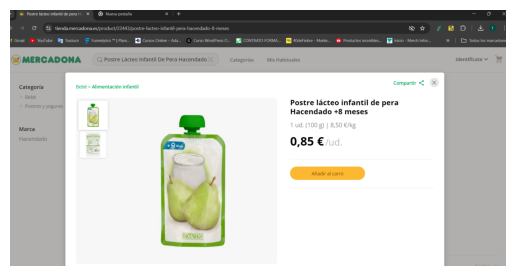

In [77]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargamos la imagen

img = mpimg.imread('/content/Producto_Mercadona.png')

# Mostramos la imagen

plt.imshow(img)
plt.axis('off')  # Quitamos los ejes
plt.show()

Incluimos la URL de la página de venta del producto para facilitar la verificación

https://tienda.mercadona.es/product/22443/postre-lacteo-infantil-pera-hacendado-8-meses

3.	¿Cómo nos encontramos posicionados según precio y variedad de productos en las principales categorías con respecto a todas las marcas?

In [78]:
df_supermecados.head()

,Nombre,Precio,Precio_unidad_outlayers,Categoria,Subcategoria,Marca,Tipo de Marca,Unidad Medida,Supermercado,Precio_Estatus
0,Aceite de oliva virgen extra Hacendado,28.80,9.60,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
1,Aceite de oliva virgen Hacendado,26.30,8.77,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
2,Aceite de oliva suave Hacendado,23.90,7.97,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
3,Aceite de oliva intenso Hacendado,23.90,7.97,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Outlier
4,Aceite de oliva virgen extra Hacendado,9.65,9.65,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier


In [79]:
# Creamos un filtro para mostrar solamente los productos que vamos a tener en cuenta para el analisis.

Supermercados_sin_outliers=df_supermecados.loc[df_supermecados["Precio_Estatus"]=="Inlier"]

In [80]:
Supermercados_sin_outliers

,Nombre,Precio,Precio_unidad_outlayers,Categoria,Subcategoria,Marca,Tipo de Marca,Unidad Medida,Supermercado,Precio_Estatus
4,Aceite de oliva virgen extra Hacendado,9.65,9.65,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
5,Aceite De Oliva Virgen Hacendado,8.95,8.95,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
6,Aceite De Oliva Virgen Extra Hacendado Gran Se...,8.10,10.80,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
7,"Aceite De Oliva 0,4º Hacendado",8.00,8.00,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
8,Aceite De Oliva 1º Hacendado,8.00,8.00,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
...,...,...,...,...,...,...,...,...,...,...
21467,Danonino Sabor Fresa Y Plátano Danone,1.30,4.33,Postres y yogures,Yogures Y Postres Infantiles,Danone,COMERCIAL,KILO,Mercadona,Inlier
21468,Postre Lácteo Infantil De Cereales Y Miel +12 ...,0.85,8.50,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier
21469,Postre Lácteo Infantil De Fresa Y Plátano Hace...,0.85,8.50,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier
21470,Postre Lácteo Infantil De Galleta Hacendado +8...,0.85,8.50,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier


In [81]:
# A partir del filtro aplicado en el df_supermercados, utilizaremos este dataframe para crear otro que muestre el precio promedio y la cantidad de productos,
# categorizados por tipo de marcas, categorías y supermercados.

df_variedad_precio_cat = Supermercados_sin_outliers.groupby(['Supermercado', 'Categoria', 'Tipo de Marca']).agg(
    Precio_Promedio=('Precio', 'mean'),
    Cantidad_Productos=('Nombre', 'count')
).round(2).reset_index()



In [39]:
# Mostrar el DataFrame agrupado
df_variedad_precio_cat

,Supermercado,Categoria,Tipo de Marca,Precio_Promedio,Cantidad_Productos
0,Carrefour,"Aceite, especias y salsas",BLANCA,2.81,173
1,Carrefour,"Aceite, especias y salsas",COMERCIAL,4.71,338
2,Carrefour,Agua y refrescos,BLANCA,1.01,56
3,Carrefour,Agua y refrescos,COMERCIAL,2.23,175
4,Carrefour,Aperitivos,BLANCA,2.58,363
...,...,...,...,...,...
148,Mercadona,Pizzas y platos preparados,COMERCIAL,3.93,13
149,Mercadona,Postres y yogures,BLANCA,1.94,210
150,Mercadona,Postres y yogures,COMERCIAL,2.77,27
151,Mercadona,Zumos,BLANCA,1.42,47


In [82]:
# A continuación, mostraremos cómo crear el nuevo dataframe df_variedad_precio_cat y visualizaremos los resultados mediante un gráfico de líneas para presentar la información de manera más clara.

# Primero, importamos las bibliotecas necesarias y creamos el dataframe con las agregaciones requeridas. Luego, generaremos el gráfico de líneas.

import plotly.express as px

# Filtramos el DataFrame primero por marcas blancas y las categorias de Maquillaje y Papeleria ya que son dos categorias en las que solamente tienen productos un supermercado.
df_marcas_blancas = df_variedad_precio_cat[df_variedad_precio_cat["Tipo de Marca"] == "BLANCA"]
df_marcas_blancas1 = df_marcas_blancas[(df_marcas_blancas["Categoria"] !="Maquillaje") & (df_marcas_blancas["Categoria"] !="Papelería")]


# Creamos el gráfico de líneas para marcas blancas
fig_blancas = px.line(df_marcas_blancas1, x="Categoria", y="Precio_Promedio", color="Supermercado",
                      hover_data=["Cantidad_Productos"], markers=True)

# Personalizamos el gráfico de marcas blancas
fig_blancas.update_traces(hovertemplate="<b>%{x}</b><br>Precio Promedio: %{y}€<br>Cantidad Productos: %{customdata[0]}")
fig_blancas.update_layout(
    title="Precio Promedio por Categoría y Supermercado (Marcas Blancas)",
    xaxis_title="Categoría",
    yaxis_title="Precio Promedio (€)",
    legend_title="Supermercado",
    hovermode="closest"
)

# Filtramos también los productos con marcas comerciales
df_marcas_comerciales = df_variedad_precio_cat[df_variedad_precio_cat["Tipo de Marca"] == "COMERCIAL"]
df_marcas_comerciales1 = df_marcas_comerciales[(df_marcas_comerciales["Categoria"] !="Maquillaje") & (df_marcas_comerciales["Categoria"] !="Papelería")]


# Creamos el gráfico de líneas para marcas comerciales
fig_comerciales = px.line(df_marcas_comerciales1, x="Categoria", y="Precio_Promedio", color="Supermercado",
                        hover_data=["Cantidad_Productos"], markers=True)

# Personalizamos el gráfico de marcas comerciales
fig_comerciales.update_traces(hovertemplate="<b>%{x}</b><br>Precio Promedio: %{y}€<br>Cantidad Productos: %{customdata[0]}")
fig_comerciales.update_layout(
    title="Precio Promedio por Categoría y Supermercado (Marcas Comerciales)",
    xaxis_title="Categoría",
    yaxis_title="Precio Promedio (€)",
    legend_title="Supermercado",
    hovermode="closest"
)

# Mostramos los gráficos
fig_blancas.show()
fig_comerciales.show()

En lineas generales se puede observar que en lo que respecta a las **marcas blancas**, Mercadona mantiene una estrategia de precios competitiva en la mayoría de las categorías de productos. En particular, se observa que los precios de Mercadona son consistentemente más bajos o similares en comparación con Carrefour, y a menudo están en línea con los precios de Dia.

Podemos resaltar categorías como "Bebé", "Fitoterapia y parafarmacia", "Aceite, especias y salsas" y "Aperitivos"  en los que Mercadona ofrece precios significativamente más bajos que Carrefour, lo cual puede ser aprovechado en las estrategias de marketing para destacar el valor ofrecido a los consumidores.

Aunque Mercadona mantiene una posición fuerte en la mayoría de las categorías equiparandose practicamente a la media de precios de DIA (Supermercado que posee en lineas generales los mejores precios), hay ciertas areas de mejora como pueden ser las categorias de "Mascotas", "Huevos, leche y mantequilla", "Cuidado del cabello" o "congelados", donde se puede explorar estrategias adicionales para mejorar aún más la competitividad de precios frente su competencia.

En resumen, Mercadona se posiciona favorablemente en comparación con Carrefour y se acerca en ciertas categorias a los precios medios de marcas blancas de DIA. A pesar de seguir teniendo precios medios más altos en otras categorias, se puede ver como una ventaja por parte de los consumidores con respecto al fortalecimiento de la percepción de valor y calidad que ofrece Mercadona. Además, se pueden identificar oportunidades específicas para ajustar precios y reforzar la competitividad en ciertas categorías.


En relación con las conclusiones extraídas sobre los precios medios de las **marcas comerciale**s ofrecidas por Mercadona en cada categoría, observamos que, a diferencia de la consistencia previa, esta vez hay una mayor dispersión en los precios medios dependiendo de las distintas categorías y, presumiblemente, de las diversas marcas comerciales que ofrece Mercadona.

En términos generales, la mayoría de los precios medios de las diferentes categorías están por debajo de los de las marcas comerciales de Carrefour y, dependiendo de la categoría, Mercadona tiene un mejor posicionamiento en el mercado en comparación con los precios medios de las marcas comerciales de Dia.

In [83]:
# Para tener más información acerca de la diferencia entre la variedad de productos de los supermercados,
# creamos un Dataframe con la variedad de productos por categoria y supermercado
df_supermercado_sin_outliers_ni_maq_pap = Supermercados_sin_outliers[(Supermercados_sin_outliers["Categoria"] != "Maquillaje") & (Supermercados_sin_outliers["Categoria"] != "Papeleria")]

df_variedad_prd_cat = df_supermercado_sin_outliers_ni_maq_pap.groupby(['Supermercado', 'Categoria']).agg(
    Cantidad_productos=('Nombre', 'count')
).unstack(fill_value=0).stack().reset_index()

# Calculamos el promedio de productos por categoría
df_total_categoria = df_variedad_prd_cat.groupby('Categoria')['Cantidad_productos'].sum().reset_index()
df_total_categoria.rename(columns={'Cantidad_productos': 'Total_productos_por_categoria'}, inplace=True)

# Unimos el DataFrame original con el DataFrame de promedios por categoría
df_variedad_prd_cat = pd.merge(df_variedad_prd_cat, df_total_categoria, on='Categoria')

# Calculamos la diferencia porcentual
df_variedad_prd_cat['Proporcion_porcentual'] = (((df_variedad_prd_cat['Cantidad_productos']) * 100)/df_variedad_prd_cat['Total_productos_por_categoria']).round(2)


In [85]:
df_variedad_prd_cat

,Supermercado,Categoria,Cantidad_productos,Total_productos_por_categoria,Proporcion_porcentual
0,Carrefour,"Aceite, especias y salsas",511,790,64.68
1,Dia,"Aceite, especias y salsas",134,790,16.96
2,Mercadona,"Aceite, especias y salsas",145,790,18.35
3,Carrefour,Agua y refrescos,231,645,35.81
4,Dia,Agua y refrescos,223,645,34.57
...,...,...,...,...,...
73,Dia,Postres y yogures,187,1076,17.38
74,Mercadona,Postres y yogures,237,1076,22.03
75,Carrefour,Zumos,151,222,68.02
76,Dia,Zumos,19,222,8.56


In [86]:
# En base al Dataframe creado de variedad de productos, creamos una gráfica de columnas en las que tengan cada columna una etiqueta con el campo de Diferencia_porcentual

# Creamos el gráfico de barras
fig = px.bar(df_variedad_prd_cat, x="Categoria", y="Proporcion_porcentual", color="Supermercado",
             text="Proporcion_porcentual", barmode="relative", hover_data={"Cantidad_productos": True, "Proporcion_porcentual": True})

# Personalizamos el gráfico
fig.update_traces(texttemplate='%{text}%', textposition='inside', insidetextanchor='middle', textfont=dict(size=12))
fig.update_layout(
    title="Variedad de Productos por Categoría y Supermercado",
    xaxis_title="Categoría",
    yaxis_title="Proporcion_porcentual(%)",
    legend_title="Supermercado",
    width=1250,
    height=800
)

# Mostramos el gráfico
fig.show()


Observando el gráfico de barras, se puede ver a simple vista que Carrefour es el supermercado con la mayor variedad de productos y ofertas en als diferentes categorias de supermercado, lo que la hace la mejor posicionada en este aspecto. Mercadona se mantiene por detrás teniendo unicamente en la categoria de "Cacao, café e infusiones" una mayor variedad de productos.

Esto sugiere que Mercadona podría estar adoptando una estrategia de concentración en ciertas categorías clave, posiblemente basada en la demanda del consumidor, las tendencias del mercado o las fortalezas internas. Sin embargo, esta estrategia puede limitar la diversidad de la oferta de productos de Mercadona en comparación con Carrefour.


In [87]:
# Veamos ahora como se posiciona nuestro cliente en base al precio por categorias en el mercado:

df_precio_cat = Supermercados_sin_outliers.groupby(['Supermercado', 'Categoria']).agg(
    Precio_Promedio=('Precio', 'mean')
).round(2).reset_index()

In [88]:
df_precio_cat

,Supermercado,Categoria,Precio_Promedio
0,Carrefour,"Aceite, especias y salsas",4.07
1,Carrefour,Agua y refrescos,1.93
2,Carrefour,Aperitivos,2.65
3,Carrefour,"Arroz, legumbres y pasta",2.37
4,Carrefour,"Azúcar, caramelos y chocolate",3.45
...,...,...,...
72,Mercadona,Mascotas,3.34
73,Mercadona,Panadería y pastelería,2.35
74,Mercadona,Pizzas y platos preparados,3.31
75,Mercadona,Postres y yogures,2.03


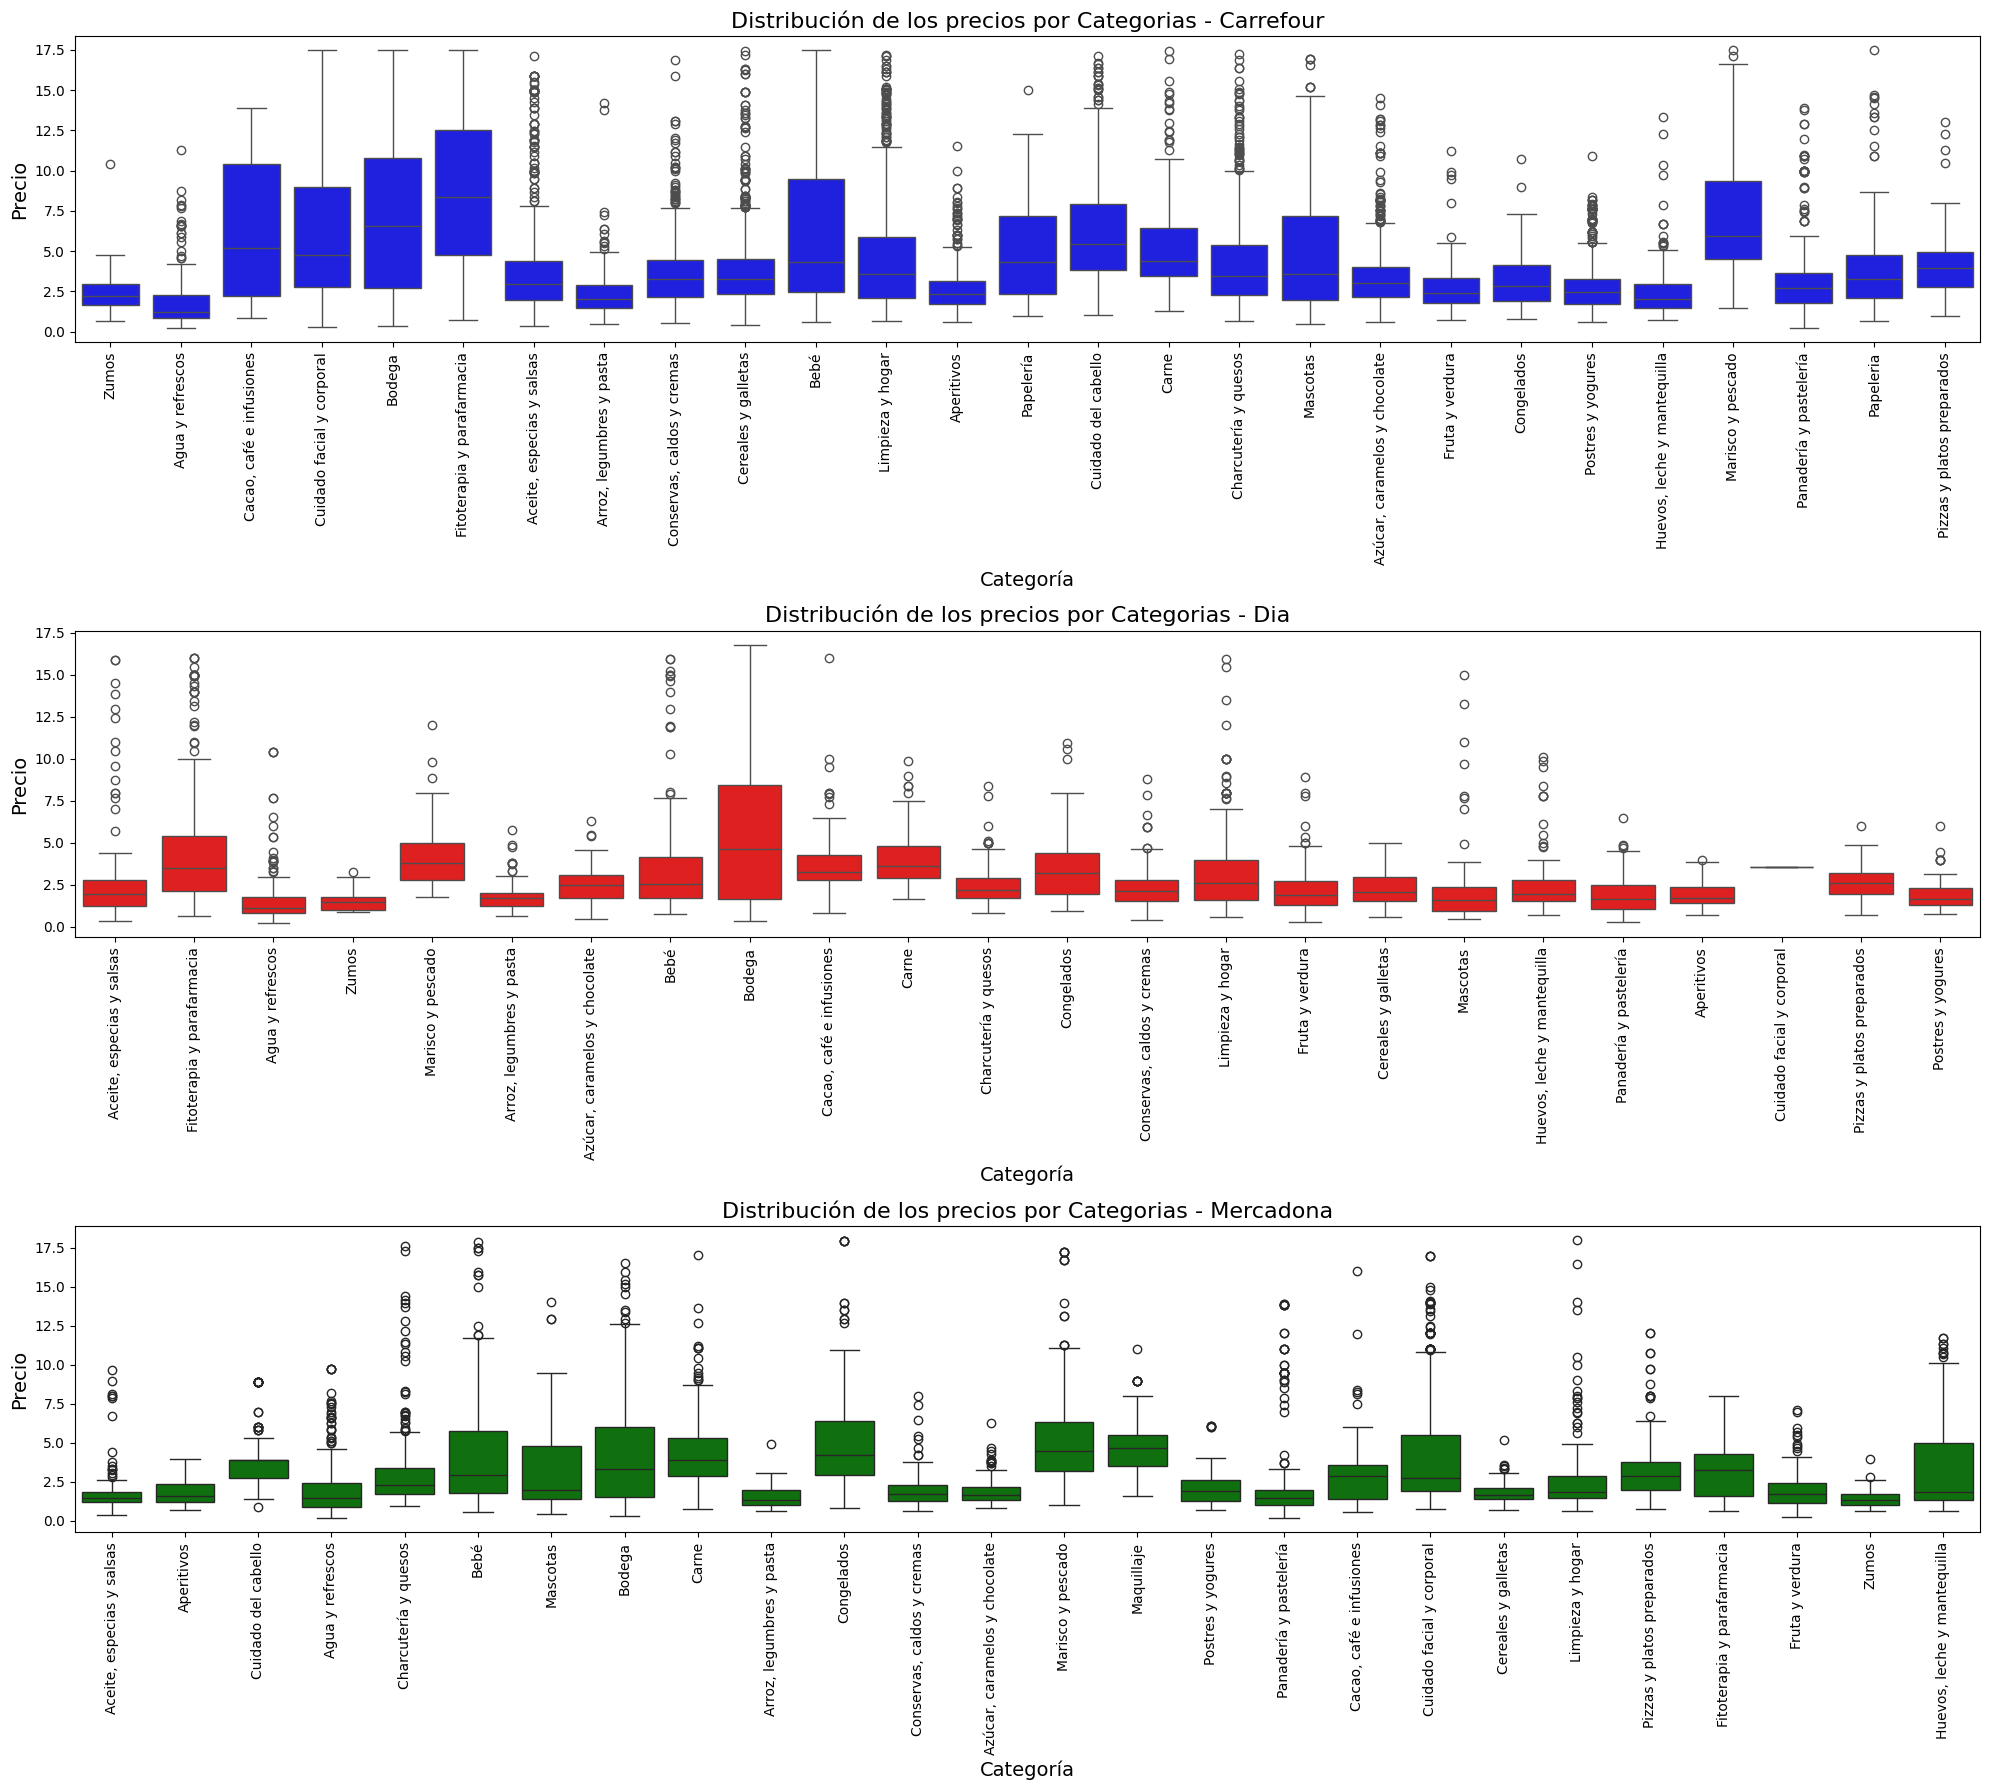

In [89]:
# Configurar la figura y los ejes con mayor ancho
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18))

# Crear el boxplot para Carrefour en azul
sns.boxplot(ax=axes[0], x='Categoria', y='Precio', data=Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == "Carrefour"], color='blue')
axes[0].set_title('Distribución de los precios por Categorias - Carrefour', fontsize=16)
axes[0].set_xlabel('Categoría', fontsize=14)
axes[0].set_ylabel('Precio', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)

# Crear el boxplot para Dia en rojo
sns.boxplot(ax=axes[1], x='Categoria', y='Precio', data=Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == "Dia"], color='red')
axes[1].set_title('Distribución de los precios por Categorias - Dia', fontsize=16)
axes[1].set_xlabel('Categoría', fontsize=14)
axes[1].set_ylabel('Precio', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

# Crear el boxplot para Mercadona en verde
sns.boxplot(ax=axes[2], x='Categoria', y='Precio', data=Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == "Mercadona"], color='green')
axes[2].set_title('Distribución de los precios por Categorias - Mercadona', fontsize=16)
axes[2].set_xlabel('Categoría', fontsize=14)
axes[2].set_ylabel('Precio', fontsize=14)
axes[2].tick_params(axis='x', rotation=90)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Si observamos primero de manera individual cada supermercado, podemos apreciar que Carrefour parece tener una distribución de precios más amplia en la mayoría de las categorías de supermercado, lo que indica una mayor variabilidad en sus precios, tambien debido a la gran cantidad de oferta que tiene por categoria, lo cual supone una gran diferencia con respecto al resto.
Dia, Por otro lado, muestra una distribución de precios más estrecha en comparación con Carrefour, lo que indica una menor variabilidad en sus precios, debido también a la menor cantidad de productos ofertados. Esto podría sugerir una estrategia de precios más uniforme en todas las categorías.
Mientras que Mercadona muestra una distribución de precios similar a la de Dia en las diferentes categorias, pero con una variabilidad ligeramente mayor en ciertas categorías.

En términos generales, Mercadona y Dia parecen seguir una estrategia de precios más uniforme en comparación con Carrefour. Sin embargo, podría ser beneficioso para Mercadona revisar esta estrategia en función de las preferencias cambiantes de los consumidores y las tendencias del mercado.

5.	Actualmente queremos destinar dinero para igualar los mejores precios de la competencia. ¿Cuál es la cantidad total a invertir?

In [90]:
# Calculamos el precio medio de los Precio_unidad_outlayers por supermercado y por categoria
df_precio_Dia = Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == 'Dia'].groupby(['Supermercado', 'Categoria']).agg(
    Precio_Promedio=('Precio', 'mean'),
    Producto_precio_max=('Precio', 'max'),
    Producto_precio_min=('Precio', 'min'),
).round(2).reset_index()


df_precio_Carrefour = Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == 'Carrefour'].groupby(['Supermercado', 'Categoria']).agg(
    Precio_Promedio=('Precio', 'mean'),
    Producto_precio_max=('Precio', 'max'),
    Producto_precio_min=('Precio', 'min'),
).round(2).reset_index()


df_precio_Mercadona = Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == 'Mercadona'].groupby(['Supermercado', 'Categoria']).agg(
    Precio_Promedio=('Precio', 'mean'),
    Producto_precio_max=('Precio', 'max'),
    Producto_precio_min=('Precio', 'min'),
).round(2).reset_index()



In [91]:
df_precio_Dia

,Supermercado,Categoria,Precio_Promedio,Producto_precio_max,Producto_precio_min
0,Dia,"Aceite, especias y salsas",2.90,15.89,0.35
1,Dia,Agua y refrescos,1.65,10.44,0.22
2,Dia,Aperitivos,1.88,3.99,0.70
3,Dia,"Arroz, legumbres y pasta",1.82,5.79,0.65
4,Dia,"Azúcar, caramelos y chocolate",2.50,6.29,0.49
5,Dia,Bebé,3.85,15.95,0.75
6,Dia,Bodega,5.65,16.79,0.35
7,Dia,"Cacao, café e infusiones",3.83,15.99,0.81
8,Dia,Carne,4.10,9.89,1.65
9,Dia,Cereales y galletas,2.25,4.99,0.59


In [92]:
df_precio_Carrefour

,Supermercado,Categoria,Precio_Promedio,Producto_precio_max,Producto_precio_min
0,Carrefour,"Aceite, especias y salsas",4.07,17.09,0.35
1,Carrefour,Agua y refrescos,1.93,11.28,0.22
2,Carrefour,Aperitivos,2.65,11.50,0.60
3,Carrefour,"Arroz, legumbres y pasta",2.37,14.19,0.49
4,Carrefour,"Azúcar, caramelos y chocolate",3.45,14.49,0.59
5,Carrefour,Bebé,6.13,17.49,0.60
6,Carrefour,Bodega,7.25,17.49,0.35
7,Carrefour,"Cacao, café e infusiones",6.30,13.89,0.85
8,Carrefour,Carne,5.40,17.45,1.30
9,Carrefour,Cereales y galletas,3.90,17.45,0.43


In [93]:
df_precio_Mercadona

,Supermercado,Categoria,Precio_Promedio,Producto_precio_max,Producto_precio_min
0,Mercadona,"Aceite, especias y salsas",1.90,9.65,0.35
1,Mercadona,Agua y refrescos,2.24,9.72,0.22
2,Mercadona,Aperitivos,1.79,3.95,0.70
3,Mercadona,"Arroz, legumbres y pasta",1.49,4.90,0.65
4,Mercadona,"Azúcar, caramelos y chocolate",1.92,6.30,0.85
5,Mercadona,Bebé,4.80,17.85,0.60
6,Mercadona,Bodega,4.31,16.50,0.29
7,Mercadona,"Cacao, café e infusiones",3.01,15.99,0.55
8,Mercadona,Carne,4.40,17.00,0.77
9,Mercadona,Cereales y galletas,1.83,5.15,0.70


In [94]:
# Unir los DataFrames por categoría
df_precio_comparacion = pd.merge(df_precio_Dia, df_precio_Carrefour, on='Categoria', suffixes=('_Dia', '_Carrefour'))
df_precio_comparacion = pd.merge(df_precio_comparacion, df_precio_Mercadona, on='Categoria', suffixes=('', '_Mercadona'))

# Renombrar la columna Precio_Promedio en df_precio_und_Mercadona a Precio_Promedio_Mercadona
df_precio_comparacion = df_precio_comparacion.rename(columns={'Precio_Promedio': 'Precio_Promedio_Mercadona'})

# Calcular las diferencias de precios medios
df_precio_comparacion['Diferencia_Dia_Carrefour'] = df_precio_comparacion['Precio_Promedio_Dia'] - df_precio_comparacion['Precio_Promedio_Carrefour']
df_precio_comparacion['Diferencia_Dia_Mercadona'] = df_precio_comparacion['Precio_Promedio_Dia'] - df_precio_comparacion['Precio_Promedio_Mercadona']
df_precio_comparacion['Diferencia_Carrefour_Mercadona'] = df_precio_comparacion['Precio_Promedio_Carrefour'] - df_precio_comparacion['Precio_Promedio_Mercadona']

# Seleccionar solo las columnas relevantes
df_precio_comparacion = df_precio_comparacion[['Categoria', 'Precio_Promedio_Dia', 'Precio_Promedio_Carrefour', 'Precio_Promedio_Mercadona',
                                                      'Diferencia_Dia_Carrefour', 'Diferencia_Dia_Mercadona', 'Diferencia_Carrefour_Mercadona']]

# Mostrar el DataFrame resultante
df_precio_comparacion


,Categoria,Precio_Promedio_Dia,Precio_Promedio_Carrefour,Precio_Promedio_Mercadona,Diferencia_Dia_Carrefour,Diferencia_Dia_Mercadona,Diferencia_Carrefour_Mercadona
0,"Aceite, especias y salsas",2.90,4.07,1.90,-1.17,1.00,2.17
1,Agua y refrescos,1.65,1.93,2.24,-0.28,-0.59,-0.31
2,Aperitivos,1.88,2.65,1.79,-0.77,0.09,0.86
3,"Arroz, legumbres y pasta",1.82,2.37,1.49,-0.55,0.33,0.88
4,"Azúcar, caramelos y chocolate",2.50,3.45,1.92,-0.95,0.58,1.53
5,Bebé,3.85,6.13,4.80,-2.28,-0.95,1.33
6,Bodega,5.65,7.25,4.31,-1.60,1.34,2.94
7,"Cacao, café e infusiones",3.83,6.30,3.01,-2.47,0.82,3.29
8,Carne,4.10,5.40,4.40,-1.30,-0.30,1.00
9,Cereales y galletas,2.25,3.90,1.83,-1.65,0.42,2.07


In [95]:
# Creamos un nuevo DataFrame con las columnas necesarias para el gráfico
df_grafico_dif_precio_und = df_precio_comparacion.melt(
    id_vars=['Categoria'],
    value_vars=['Diferencia_Dia_Mercadona', 'Diferencia_Carrefour_Mercadona'],
    var_name='Tipo_Diferencia',
    value_name='Diferencia_Precio'
)

# Creamos el gráfico de barras agrupadas
fig_precio_und_comparacion = px.bar(df_grafico_dif_precio_und, x="Categoria", y="Diferencia_Precio", color="Tipo_Diferencia",
                                    barmode="group", hover_data={"Diferencia_Precio": True})

# Personalizamos el gráfico
fig_precio_und_comparacion.update_layout(
    title="Diferencia de precios entre Supermercados y Mercadona por Categoría",
    xaxis_title="Categoría",
    yaxis_title="Diferencia de Precio",
)

# Mostramos el gráfico
fig_precio_und_comparacion.show()


En base al grafico de barras expuesto, sobore la diferencia de precios por categorías en diferentes supermercados, hemos identificado varias categorías clave en las que Mercadona muestra una diferencia de precio medio notable en comparación con sus competidores. Estas categorías incluyen Agua y refrescos, Bebé (solo en comparación con DIA), Carne (solo en comparación con DIA), Charcutería y quesos (solo en comparación con DIA), Congelados, Cuidado facial y corporal (solo en comparación con DIA), Huevos, leche y mantequilla, Marisco y pescado (solo en comparación con DIA), Mascotas (solo en comparación con DIA), Panadería y pastelería (solo en comparación con DIA), y Pizzas y platos preparados (solo en comparación con DIA). Estas observaciones sugieren que Mercadona no está posicionado en términos de precios en estas categorías. Para igualar los precios más competitivos de la competencia, sugerimos realizar un análisis adicional para determinar cuáles de estas categorías han generado más ventas para la competencia. Esto permitirá a Mercadona invertir de manera estratégica en estas categorías y potencialmente aumentar las ventas.

In [96]:
# Calcular las diferencias absolutas entre Mercadona y Dia
df_precio_comparacion['Diferencia_Mercadona_Dia'] = (df_precio_comparacion['Precio_Promedio_Mercadona'] - df_precio_comparacion['Precio_Promedio_Dia'])

# Calcular las diferencias absolutas entre Mercadona y Carrefour
df_precio_comparacion['Diferencia_Mercadona_Carrefour'] = (df_precio_comparacion['Precio_Promedio_Mercadona'] - df_precio_comparacion['Precio_Promedio_Carrefour'])

# Encontrar la mayor diferencia por categoría
df_precio_comparacion['Max_Diferencia_Mercadona'] = df_precio_comparacion[['Diferencia_Mercadona_Dia', 'Diferencia_Mercadona_Carrefour']].max(axis=1)

# Obtener las categorías con las mayores diferencias
categorias_max_diferencia = df_precio_comparacion.loc[df_precio_comparacion['Max_Diferencia_Mercadona'] == df_precio_comparacion['Max_Diferencia_Mercadona'].max()]

# Mostrar los resultados
print(f"Categoría con mayor diferencia de precio medio de Mercadona respecto a Dia y Carrefour:")
print(categorias_max_diferencia[['Categoria', 'Max_Diferencia_Mercadona']])


Categoría con mayor diferencia de precio medio de Mercadona respecto a Dia y Carrefour:
     Categoria  Max_Diferencia_Mercadona
11  Congelados                      2.21


In [97]:
df_max_ventas_cat = df_compras.groupby(['id_reference_supermarket', 'category']).agg(
    Cantidad_total_vendida=('category', 'count'),
    Precio_medio_categoria=('price', 'mean'),
).round(2).reset_index()

In [98]:
df_max_ventas_cat = df_max_ventas_cat.sort_values('Cantidad_total_vendida', ascending=False)

In [99]:
df_max_ventas_cat

,id_reference_supermarket,category,Cantidad_total_vendida,Precio_medio_categoria
10,M3,desayuno_dulces_y_pan_cafe_capsulas,21402,4.14
0,M1,agua_y_refrescos_isotonico_y_energetico,15545,1.56
1,M1,agua_y_refrescos_refresco_de_cola,14089,2.42
3,M3,alimentacion_dieteticos_complementos_nutricion...,8801,4.34
16,M3,desayuno_dulces_y_pan_infusiones_terapeuticas,7097,2.18
2,M3,alimentacion_caldos_sopas_y_pures_caldo_concen...,5568,1.50
15,M3,desayuno_dulces_y_pan_infusiones_te,5080,1.90
21,M3,frescos_verdura_y_hortalizas_lechuga_y_endibias,3039,1.27
22,M3,lacteos_y_huevos_horchatas_horchatas,2543,1.68
12,M3,desayuno_dulces_y_pan_infusiones_manzanilla,2409,1.61


Nuestro análisis de precios indica que Mercadona, en comparación con sus competidores, muestra una diferencia notable en el precio medio de productos dentro de las subcategorías de lácteos y huevos, así como en la categoría de platos preparados (Nuestra Cocina al Día). Además, es importante destacar que estas categorías se encuentran entre las de mayor volumen de ventas en los competidores. Esta situación representa una oportunidad estratégica para Mercadona. Ajustar la política de precios en estas categorías específicas podría ser una medida efectiva para mejorar la competitividad de Mercadona en el mercado. Este ajuste, alineado con las tendencias del mercado y las preferencias de los consumidores, podría potencialmente conducir a un aumento en las ventas y a una mayor participación de mercado.

In [102]:
# Para poder calcular el total a invertir para igualar en ambas categorias al precio de la competencia, haremos lo siguiente:
# calculamos el total de ventas por subcategorias

df_lacteos_huevos = df_max_ventas_cat[df_max_ventas_cat['category'].str.contains('lacteos_y_huevos')]


In [103]:
df_lacteos_huevos

,id_reference_supermarket,category,Cantidad_total_vendida,Precio_medio_categoria
22,M3,lacteos_y_huevos_horchatas_horchatas,2543,1.68
25,M3,lacteos_y_huevos_huevos_huevos_medianos,1005,1.49
23,M3,lacteos_y_huevos_huevos_huevos_extra_grandes,513,0.99
24,M3,lacteos_y_huevos_huevos_huevos_grandes,464,1.59


In [107]:
df_lacteos_huevos_sum_ventas = pd.DataFrame({'Total Ventas': [df_lacteos_huevos['Cantidad_total_vendida'].sum()]})

In [108]:
print(df_lacteos_huevos_sum_ventas)

   Total Ventas
0          4525


In [109]:
# Y se multiplicaria por la diferncia de precio medio por categoria de entre mercadona y DIA para saber el total a invertir en esa categoria

total_invertir_cat_leche_huevos_mantequilla=4525*0.73

print(f'El total a invertir para la categoria de Leche, huevos y mantequilla es de: {total_invertir_cat_leche_huevos_mantequilla}€')

El total a invertir para la categoria de Leche, huevos y mantequilla es de: 3303.25€


In [110]:
# En cuanto a la categoria de Pizzas y platos preparados la cantidad vendida han sido de unos 1066 und

total_invertir_cat_Pizzas_y_platos_preparados=1066*0.69

print(f'El total a invertir para la categoria de Pizzas y platos preparados es de: {total_invertir_cat_Pizzas_y_platos_preparados}€')

El total a invertir para la categoria de Pizzas y platos preparados es de: 735.54€


In [111]:
# Total a invertir
total_a_invertir = total_invertir_cat_leche_huevos_mantequilla + total_invertir_cat_Pizzas_y_platos_preparados
print(f'El total a invertir: {total_a_invertir}€')

El total a invertir: 4038.79€


7.	¿Cuántas marcas blancas tiene mi competencia? ¿Estamos mejor o peor posicionados según precio y variedad?

In [112]:
# Filtramos el DataFrame para obtener solo las filas donde "Tipo de Marca" es "BLANCA"
df_filtro_marcas_blancas = Supermercados_sin_outliers.loc[df_supermecados["Tipo de Marca"] == "BLANCA"]

# Obtenemos las marcas únicas dentro del DataFrame filtrado
nombre_marcas_blancas = df_filtro_marcas_blancas["Marca"].unique()


In [113]:
nombre_marcas_blancas

array(['Hacendado', 'Dia', 'Dia Selección Mundial', 'Deliplus',
       'Carrefour', 'Nuestra Tierra Carrefour', 'Ecocesta Carrefour',
       'Mi Menú Carrefour', 'Compy', 'Dia Nuestra Alacena',
       'Bosque Verde', 'Listo Para Comer', 'Dia Galleteca', 'Mercadona'],
      dtype=object)

In [115]:
# Creamos el Dataframe que nos calcule la cantidad de marcas blancas que hay por categoria en cada supermercado
df_comparacion_marcas_blancas = df_filtro_marcas_blancas.groupby(['Supermercado', 'Categoria']).agg(
    Cantidad_marcas_blancas=('Marca', 'nunique')
).round(2).reset_index()

In [116]:
df_comparacion_marcas_blancas

,Supermercado,Categoria,Cantidad_marcas_blancas
0,Carrefour,"Aceite, especias y salsas",3
1,Carrefour,Agua y refrescos,1
2,Carrefour,Aperitivos,3
3,Carrefour,"Arroz, legumbres y pasta",4
4,Carrefour,"Azúcar, caramelos y chocolate",2
...,...,...,...
71,Mercadona,Mascotas,1
72,Mercadona,Panadería y pastelería,1
73,Mercadona,Pizzas y platos preparados,2
74,Mercadona,Postres y yogures,1


In [117]:
# Creamos el gráfico de barras agrupadas
fig_num_marcas_blancas = px.bar(df_comparacion_marcas_blancas, x="Categoria", y="Cantidad_marcas_blancas", color="Supermercado",
                                    barmode="group", hover_data={"Cantidad_marcas_blancas": True})

# Personalizamos el gráfico
fig_num_marcas_blancas.update_layout(
    title="Número de Marcas Blancas por Categoria en cada Supermercado",
    xaxis_title="Categoría",
    yaxis_title="Cantidad_marcas_blancas",
)

# Mostramos el gráfico
fig_num_marcas_blancas.show()




El gráfico de barras nos muestra la cantidad de marcas blancas que tiene cada supermercado en las diferentes categorias. Se puede apreciar que Mercadona utiliza practicamente una marca blanca por categoria para darle renombre y reconocimiento en el mercado. Mientras que Carrefour opta por usar dos o tres marcas blancas más por categoria, exponiendo de esta manera su gran cantidad de variedad de productos.

In [118]:
df_filtro_marcas_blancas

,Nombre,Precio,Precio_unidad_outlayers,Categoria,Subcategoria,Marca,Tipo de Marca,Unidad Medida,Supermercado,Precio_Estatus
4,Aceite de oliva virgen extra Hacendado,9.65,9.65,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
5,Aceite De Oliva Virgen Hacendado,8.95,8.95,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
6,Aceite De Oliva Virgen Extra Hacendado Gran Se...,8.10,10.80,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
7,"Aceite De Oliva 0,4º Hacendado",8.00,8.00,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
8,Aceite De Oliva 1º Hacendado,8.00,8.00,"Aceite, especias y salsas","Aceite, Vinagre Y Sal",Hacendado,BLANCA,LITRO,Mercadona,Inlier
...,...,...,...,...,...,...,...,...,...,...
21465,Petit Sabores Hacendado,1.35,1.88,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier
21468,Postre Lácteo Infantil De Cereales Y Miel +12 ...,0.85,8.50,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier
21469,Postre Lácteo Infantil De Fresa Y Plátano Hace...,0.85,8.50,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier
21470,Postre Lácteo Infantil De Galleta Hacendado +8...,0.85,8.50,Postres y yogures,Yogures Y Postres Infantiles,Hacendado,BLANCA,KILO,Mercadona,Inlier


In [122]:
# En cuanto al posicionamiento en precios de las marcas blancas, creamos un dataframe para mostrar el precio medio por marcas blancas en las diferentes categorias y or supermercado.

df_precio_promedio_marcas_blancas = df_filtro_marcas_blancas.groupby(['Supermercado', 'Categoria']).agg(
    Cantidad_marcas_blancas=('Marca', 'nunique'),
    precio_und_promedio=('Precio', 'mean')
).round(2).reset_index()

In [123]:
df_precio_promedio_marcas_blancas

,Supermercado,Categoria,Cantidad_marcas_blancas,precio_und_promedio
0,Carrefour,"Aceite, especias y salsas",3,2.81
1,Carrefour,Agua y refrescos,1,1.01
2,Carrefour,Aperitivos,3,2.58
3,Carrefour,"Arroz, legumbres y pasta",4,1.85
4,Carrefour,"Azúcar, caramelos y chocolate",2,2.54
...,...,...,...,...
71,Mercadona,Mascotas,1,4.73
72,Mercadona,Panadería y pastelería,1,2.41
73,Mercadona,Pizzas y platos preparados,2,3.26
74,Mercadona,Postres y yogures,1,1.94


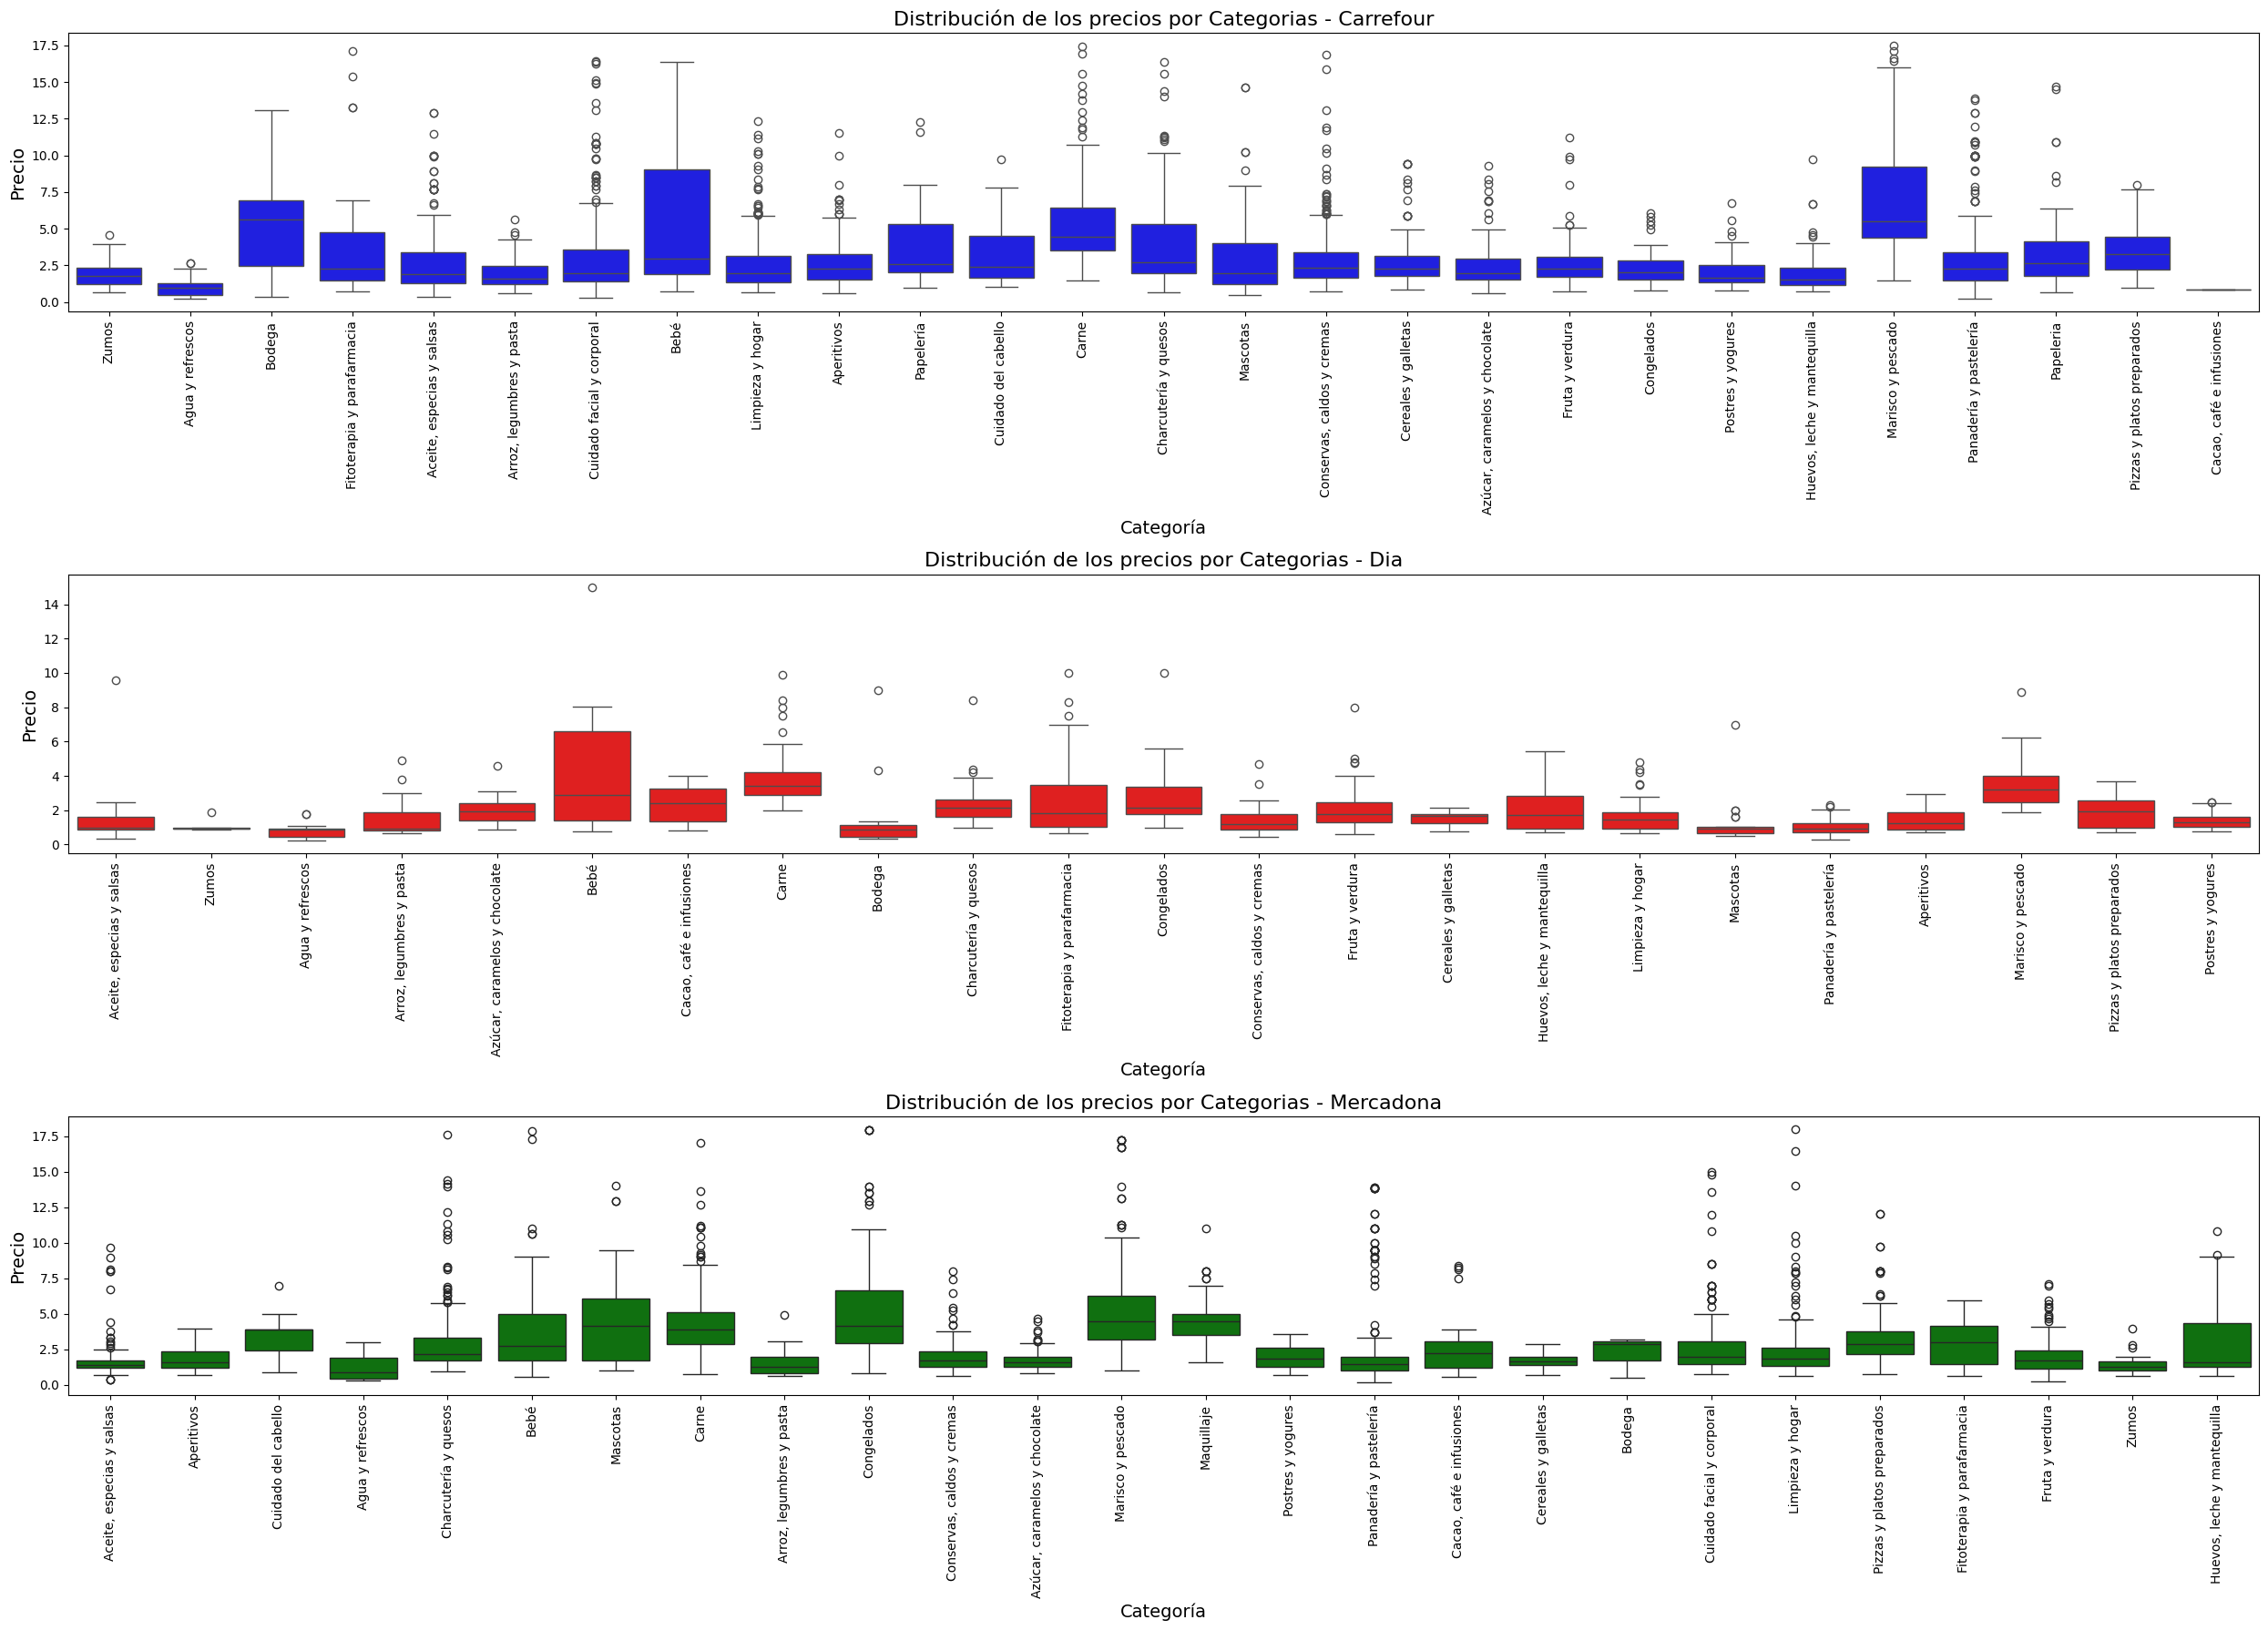

In [124]:
# Configuramos la gráfica y los ejes con mayor ancho
fig_precio_promedio_marcas_blancas, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 18))

# Crear el boxplot para Carrefour en azul
sns.boxplot(ax=axes[0], x='Categoria', y='Precio', data=df_filtro_marcas_blancas[df_filtro_marcas_blancas['Supermercado'] == "Carrefour"], color='blue')
axes[0].set_title('Distribución de los precios por Categorias - Carrefour', fontsize=16)
axes[0].set_xlabel('Categoría', fontsize=14)
axes[0].set_ylabel('Precio', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)

# Crear el boxplot para Dia en rojo
sns.boxplot(ax=axes[1], x='Categoria', y='Precio', data=df_filtro_marcas_blancas[df_filtro_marcas_blancas['Supermercado'] == "Dia"], color='red')
axes[1].set_title('Distribución de los precios por Categorias - Dia', fontsize=16)
axes[1].set_xlabel('Categoría', fontsize=14)
axes[1].set_ylabel('Precio', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

# Crear el boxplot para Mercadona en verde
sns.boxplot(ax=axes[2], x='Categoria', y='Precio', data=df_filtro_marcas_blancas[df_filtro_marcas_blancas['Supermercado'] == "Mercadona"], color='green')
axes[2].set_title('Distribución de los precios por Categorias - Mercadona', fontsize=16)
axes[2].set_xlabel('Categoría', fontsize=14)
axes[2].set_ylabel('Precio', fontsize=14)
axes[2].tick_params(axis='x', rotation=90)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


El análisis de los gráficos de caja, que representan la variedad de precios de las marcas blancas en diferentes categorías, revela varias conclusiones importantes:

**Mercadona:** Se observa que Mercadona mantiene una distribución de precios bastante uniforme en todas las categorías, con algunas excepciones notables. Esto podría indicar que Mercadona ha adoptado una estrategia de precios coherente y equilibrada en todas sus categorías de productos, posiblemente debido a una mayor variedad de productos en ciertas categorías o porque considera que estas categorías son clave para su negocio.

**DIA:** Al igual que Mercadona, DIA también sigue una estrategia de distribución de precios uniforme, sin embargo, no presenta tantos productos que se salgan de los cuartiles como Mercadona. Esto podría indicar una menor dispersión de precios en DIA.

**Carrefour:** Carrefour, por otro lado, parece tener una mayor variabilidad en sus precios, con varios valores atípicos que indican precios significativamente más altos en ciertos productos. Esto podría sugerir que Carrefour tiene una gama más amplia de productos y precios.

Estas observaciones podrían ser útiles para Mercadona al considerar su estrategia de precios en relación con sus competidores. Por ejemplo, podría considerar ajustar sus precios en ciertas categorías donde Carrefour y DIA tienen una mayor variabilidad de precios. Asimismo, podría considerar la posibilidad de introducir una mayor variedad de productos en las categorías donde actualmente tiene una distribución de precios más uniforme. Estas acciones podrían ayudar a Mercadona a mejorar su competitividad en el mercado.


9.	Estamos pensando en abrir una nueva vertical llamada Mercadona eat&go. Su objetivo es que la gente pueda comprar y comer los productos en una sala acondicionada dentro de nuestro establecimiento, Te compartimos un csv con las compras de algunos usuarios en verano. ¿Qué tipo de alimentos recomendarías y por qué?

In [131]:
# Filtramos primero los meses de verano para ver que productos se venden en verano, tanto de un supermercado como de otro.
df_verano = df_compras[(df_compras['fecha_compra'].dt.month >= 6) & (df_compras['fecha_compra'].dt.month <= 8)]

# Calculamos las ventas de esos productos en los meses de verano
df_max_ventas_productos_verano = df_verano.groupby(['category', 'name']).agg(
    Cantidad_total_vendida=('id_producto', 'count')
).reset_index()

# Realizamos una un nuevo dataframe con la columna Cantidad_total_vendida en orden descendente
df_max_ventas_productos_verano = df_max_ventas_productos_verano.sort_values('Cantidad_total_vendida', ascending=False)

# Seleccionamos los 10 productos más vendidos
top_10_prd_max_ventas = df_max_ventas_productos_verano.head(20)

top_10_prd_max_ventas

,category,name,Cantidad_total_vendida
15,agua_y_refrescos_refresco_de_cola,Refresco Coca-Cola,3492
17,agua_y_refrescos_refresco_de_cola,Refresco Coca-Cola Zero azúcar,3010
18,agua_y_refrescos_refresco_de_cola,Refresco cola Hacendado,2519
16,agua_y_refrescos_refresco_de_cola,Refresco Coca-Cola Zero Zero,2101
0,agua_y_refrescos_isotonico_y_energetico,Bebida energética Energy Drink,1946
13,agua_y_refrescos_isotonico_y_energetico,Bebida para deportistas sabor cítrico Hacendado,1510
20,agua_y_refrescos_refresco_de_cola,Refresco cola Pepsi,1495
10,agua_y_refrescos_isotonico_y_energetico,Bebida isotónica de naranja Iso drink,1489
12,agua_y_refrescos_isotonico_y_energetico,Bebida isotónica naranja Aquarius,1481
19,agua_y_refrescos_refresco_de_cola,Refresco cola Hacendado Zero azúcar,1472


In [132]:
import plotly.express as px

fig_ventas_verano = px.bar(top_10_prd_max_ventas.sort_values('Cantidad_total_vendida', ascending=True),
                         y="name", x="Cantidad_total_vendida", orientation='h',
                         title='Cantidad de Productos Vendidos en Verano',
                         labels={'name': 'Nombre del Producto', 'Cantidad_total_vendida': 'Cantidad Vendida'},
                          color_discrete_sequence=['purple'])
fig_ventas_verano.show()

Para la nueva vertical Mercadona eat&go, donde los clientes pueden comprar y consumir productos en un área designada dentro de su establecimiento, sería recomendable ofrecer una variedad de bebidas como refrescos, cervezas y bebidas energéticas, ya que estos son los productos más vendidos durante el verano. Además, sería beneficioso ofrecer aperitivos que se complementen bien con estas bebidas para mejorar la experiencia eat&go.

Es importante tener en cuenta que estos productos son opciones populares durante los meses de verano, por lo que podrían ser bien recibidos por los clientes que buscan refrescos y comidas o aperitivos rápidos. Sin embargo, también sería útil considerar la oferta de productos que son populares durante otras estaciones del año para asegurar una experiencia eat&go atractiva durante todo el año.

Por último, dado que Mercadona eat&go es un concepto donde los clientes consumen los productos dentro del establecimiento, sería recomendable considerar la inclusión de productos que normalmente no se consumen “sobre la marcha”, como platos preparados o productos frescos que se pueden consumir inmediatamente después de la compra. Esto podría diferenciar a Mercadona eat&go de otras ofertas de supermercados y atraer a los clientes que buscan una experiencia de compra y consumo más conveniente y agradable.